In [1]:
import matplotlib.pyplot as plt
import gym
import navstack_gym
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

In [2]:
env = gym.make('TreasureChestRoom-v0')
env.reset(scene_obstacle_count=13)

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [3]:
room = env.scener.room_config
pose = env.agent_current_position
env_size = env.map_resolition*env.map_size/2

/tmp/ipykernel_827331/2665374455.py:37: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)


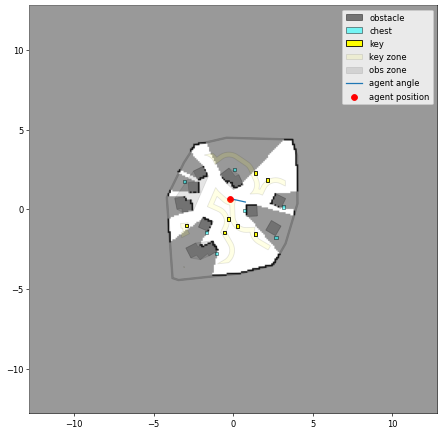

In [16]:
fig = plt.figure(0, figsize=(9,9), dpi=60)
ax = fig.add_subplot(111)
plt.xlim(-env_size, env_size)
plt.ylim(-env_size, env_size)

wall = unary_union(room.get_polygons(room.tag_wall))
obstacles = unary_union(room.get_polygons(room.tag_obstacle))
chests = unary_union(room.get_polygons(room.tag_target))
keys = unary_union(room.get_polygons(room.tag_key))
obs_zones = unary_union(room.obstacle_hulls)
key_zones = unary_union(room.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3, label="obstacle"))
ax.add_patch(PolygonPatch(chests, fc='cyan', alpha=0.5, zorder=4, label='chest'))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6, label='key'))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5, label='key zone'))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=4, label='obs zone'))

r = 1
angle_x = pose[0] + np.cos(pose[2])*r
angle_y = pose[1] + np.sin(pose[2])*r
ax.plot([pose[0],angle_x], [pose[1],angle_y], label='agent angle', zorder=4)

ax.scatter(*pose[:2], s=50, color='red', label='agent position', zorder=4)

map_img = np.copy(env.actioner.occupancy_map.T[::-1,:])
map_img[map_img==-1] = 25
map_img[map_img==0] = 50
map_img[map_img==100] = 0

ax.imshow(map_img, cmap='gray', alpha=0.8, extent=(-env_size,env_size,-env_size,env_size), zorder=3)

ax.legend()
fig.canvas.draw()
w, h = fig.canvas.get_width_height()
buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
buf.shape = (w,h,4)
buf = np.roll(buf, 3, axis=2)
plt.imshow(buf)

In [17]:
buf.shape

(540, 540, 4)